In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
schools_by_func_grade = pd.read_csv('schools_by_func_grade.csv').set_index('District')
teacher_ratio = pd.read_csv('teacher_ratio.csv').set_index('District')
teachers_by_appointment = pd.read_csv('teachers_by_appointment.csv').set_index('District')
ol_failed_2017 = pd.read_csv('ol_failed_2017.csv').set_index('District')
ol_failed_2016 = pd.read_csv('ol_failed_2016.csv').set_index('District')
ol_qualified_al = pd.read_csv('ol_qualified_al.csv').set_index('District')

In [3]:
schools_by_func_grade.columns = ['schools_1ab', 'schools_1c', 'schools_type2', 'schools_type3', 'schools_total']
schools_by_func_grade['schools_1ab'] = schools_by_func_grade['schools_1ab'] / schools_by_func_grade['schools_total']
schools_by_func_grade['schools_1c'] = schools_by_func_grade['schools_1c'] / schools_by_func_grade['schools_total']
schools_by_func_grade['schools_type2'] = schools_by_func_grade['schools_type2'] / schools_by_func_grade['schools_total']
schools_by_func_grade['schools_type3'] = schools_by_func_grade['schools_type3'] / schools_by_func_grade['schools_total']

teacher_ratio.columns = ['students_per_teacher_1ab', 'students_per_teacher_1c', 'students_per_teacher_type2', 'students_per_teacher_type3', 'students_per_teacher_boys', 'students_per_teacher_girls', 'students_per_teacher_mixed', 'students_per_teacher_total']

teachers_by_appointment.columns = ['graduate_teachers', 'trained_teachers', 'untrained_teachers',
       'trainee_teachers', 'other_teachers', 'teacher_total']
teachers_by_appointment['graduate_teachers'] = teachers_by_appointment['graduate_teachers'] / teachers_by_appointment['teacher_total']
teachers_by_appointment['trained_teachers'] = teachers_by_appointment['trained_teachers'] / teachers_by_appointment['teacher_total']
teachers_by_appointment['untrained_teachers'] = teachers_by_appointment['untrained_teachers'] / teachers_by_appointment['teacher_total']
teachers_by_appointment['trainee_teachers'] = teachers_by_appointment['trainee_teachers'] / teachers_by_appointment['teacher_total']
teachers_by_appointment['other_teachers'] = teachers_by_appointment['other_teachers'] / teachers_by_appointment['teacher_total']


In [4]:
ol_failed_2016.columns = ['2016_ol_num_sat ', '2016_ol_num_qualified_al',
       '2016_ol_perc_qualified_al', '2016_ol_num_failed',
       '2016_ol_perc_failed']

ol_failed_2016 = ol_failed_2016[['2016_ol_num_failed', '2016_ol_perc_failed']]

ol_failed_2017.columns = ['2017_ol_num_sat', '2017_ol_num_qualified_al',
       '2017_ol_perc_qualified_al', '2017_ol_num_failed',
       '2017_ol_perc_failed']

ol_failed_2017 = ol_failed_2017[['2017_ol_num_failed', '2017_ol_perc_failed']]

In [5]:
df = ol_failed_2017\
    .merge(ol_failed_2016, left_index=True, right_index=True)\
    .merge(schools_by_func_grade, left_index=True, right_index=True)\
    .merge(teacher_ratio, left_index=True, right_index=True)\
    .merge(teachers_by_appointment, left_index=True, right_index=True)\
    .merge(ol_qualified_al, left_index=True, right_index=True)

In [6]:
df.columns

Index(['2017_ol_num_failed', '2017_ol_perc_failed', '2016_ol_num_failed',
       '2016_ol_perc_failed', 'schools_1ab', 'schools_1c', 'schools_type2',
       'schools_type3', 'schools_total', 'students_per_teacher_1ab',
       'students_per_teacher_1c', 'students_per_teacher_type2',
       'students_per_teacher_type3', 'students_per_teacher_boys',
       'students_per_teacher_girls', 'students_per_teacher_mixed',
       'students_per_teacher_total', 'graduate_teachers', 'trained_teachers',
       'untrained_teachers', 'trainee_teachers', 'other_teachers',
       'teacher_total', '2012_ol_num_sat', '2012_ol_num_qualified_al',
       '2012_ol_perc_qualified_al', '2013_ol_num_sat',
       '2013_ol_num_qualified_al', '2013_ol_perc_qualified_al',
       '2014_ol_num_sat', '2014_ol_num_qualified_al',
       '2014_ol_perc_qualified_al', '2015_ol_num_sat',
       '2015_ol_num_qualified_al', '2015_ol_perc_qualified_al',
       '2016_ol_num_sat', '2016_ol_num_qualified_al',
       '2016_ol_perc_q

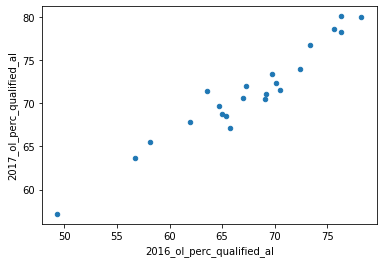

In [7]:
df.plot(kind='scatter',x='2016_ol_perc_qualified_al',y='2017_ol_perc_qualified_al')

In [8]:
df.columns

Index(['2017_ol_num_failed', '2017_ol_perc_failed', '2016_ol_num_failed',
       '2016_ol_perc_failed', 'schools_1ab', 'schools_1c', 'schools_type2',
       'schools_type3', 'schools_total', 'students_per_teacher_1ab',
       'students_per_teacher_1c', 'students_per_teacher_type2',
       'students_per_teacher_type3', 'students_per_teacher_boys',
       'students_per_teacher_girls', 'students_per_teacher_mixed',
       'students_per_teacher_total', 'graduate_teachers', 'trained_teachers',
       'untrained_teachers', 'trainee_teachers', 'other_teachers',
       'teacher_total', '2012_ol_num_sat', '2012_ol_num_qualified_al',
       '2012_ol_perc_qualified_al', '2013_ol_num_sat',
       '2013_ol_num_qualified_al', '2013_ol_perc_qualified_al',
       '2014_ol_num_sat', '2014_ol_num_qualified_al',
       '2014_ol_perc_qualified_al', '2015_ol_num_sat',
       '2015_ol_num_qualified_al', '2015_ol_perc_qualified_al',
       '2016_ol_num_sat', '2016_ol_num_qualified_al',
       '2016_ol_perc_q

In [9]:
cols = [
        
        'schools_1ab', 
        'schools_1c',
        'schools_type2', 
        'schools_type3', 
        'students_per_teacher_1ab', 
        'students_per_teacher_1c',
        'students_per_teacher_type2', 
        'students_per_teacher_type3',
        'students_per_teacher_boys',
        'students_per_teacher_girls',
        'students_per_teacher_mixed', 
        'students_per_teacher_total',
        'graduate_teachers', 
        'trained_teachers', 
        'untrained_teachers',
        'trainee_teachers', 
        'other_teachers',
        '2012_ol_perc_qualified_al',
        '2013_ol_perc_qualified_al',
        '2014_ol_perc_qualified_al',
        '2015_ol_perc_qualified_al',
        '2016_ol_perc_qualified_al'
]

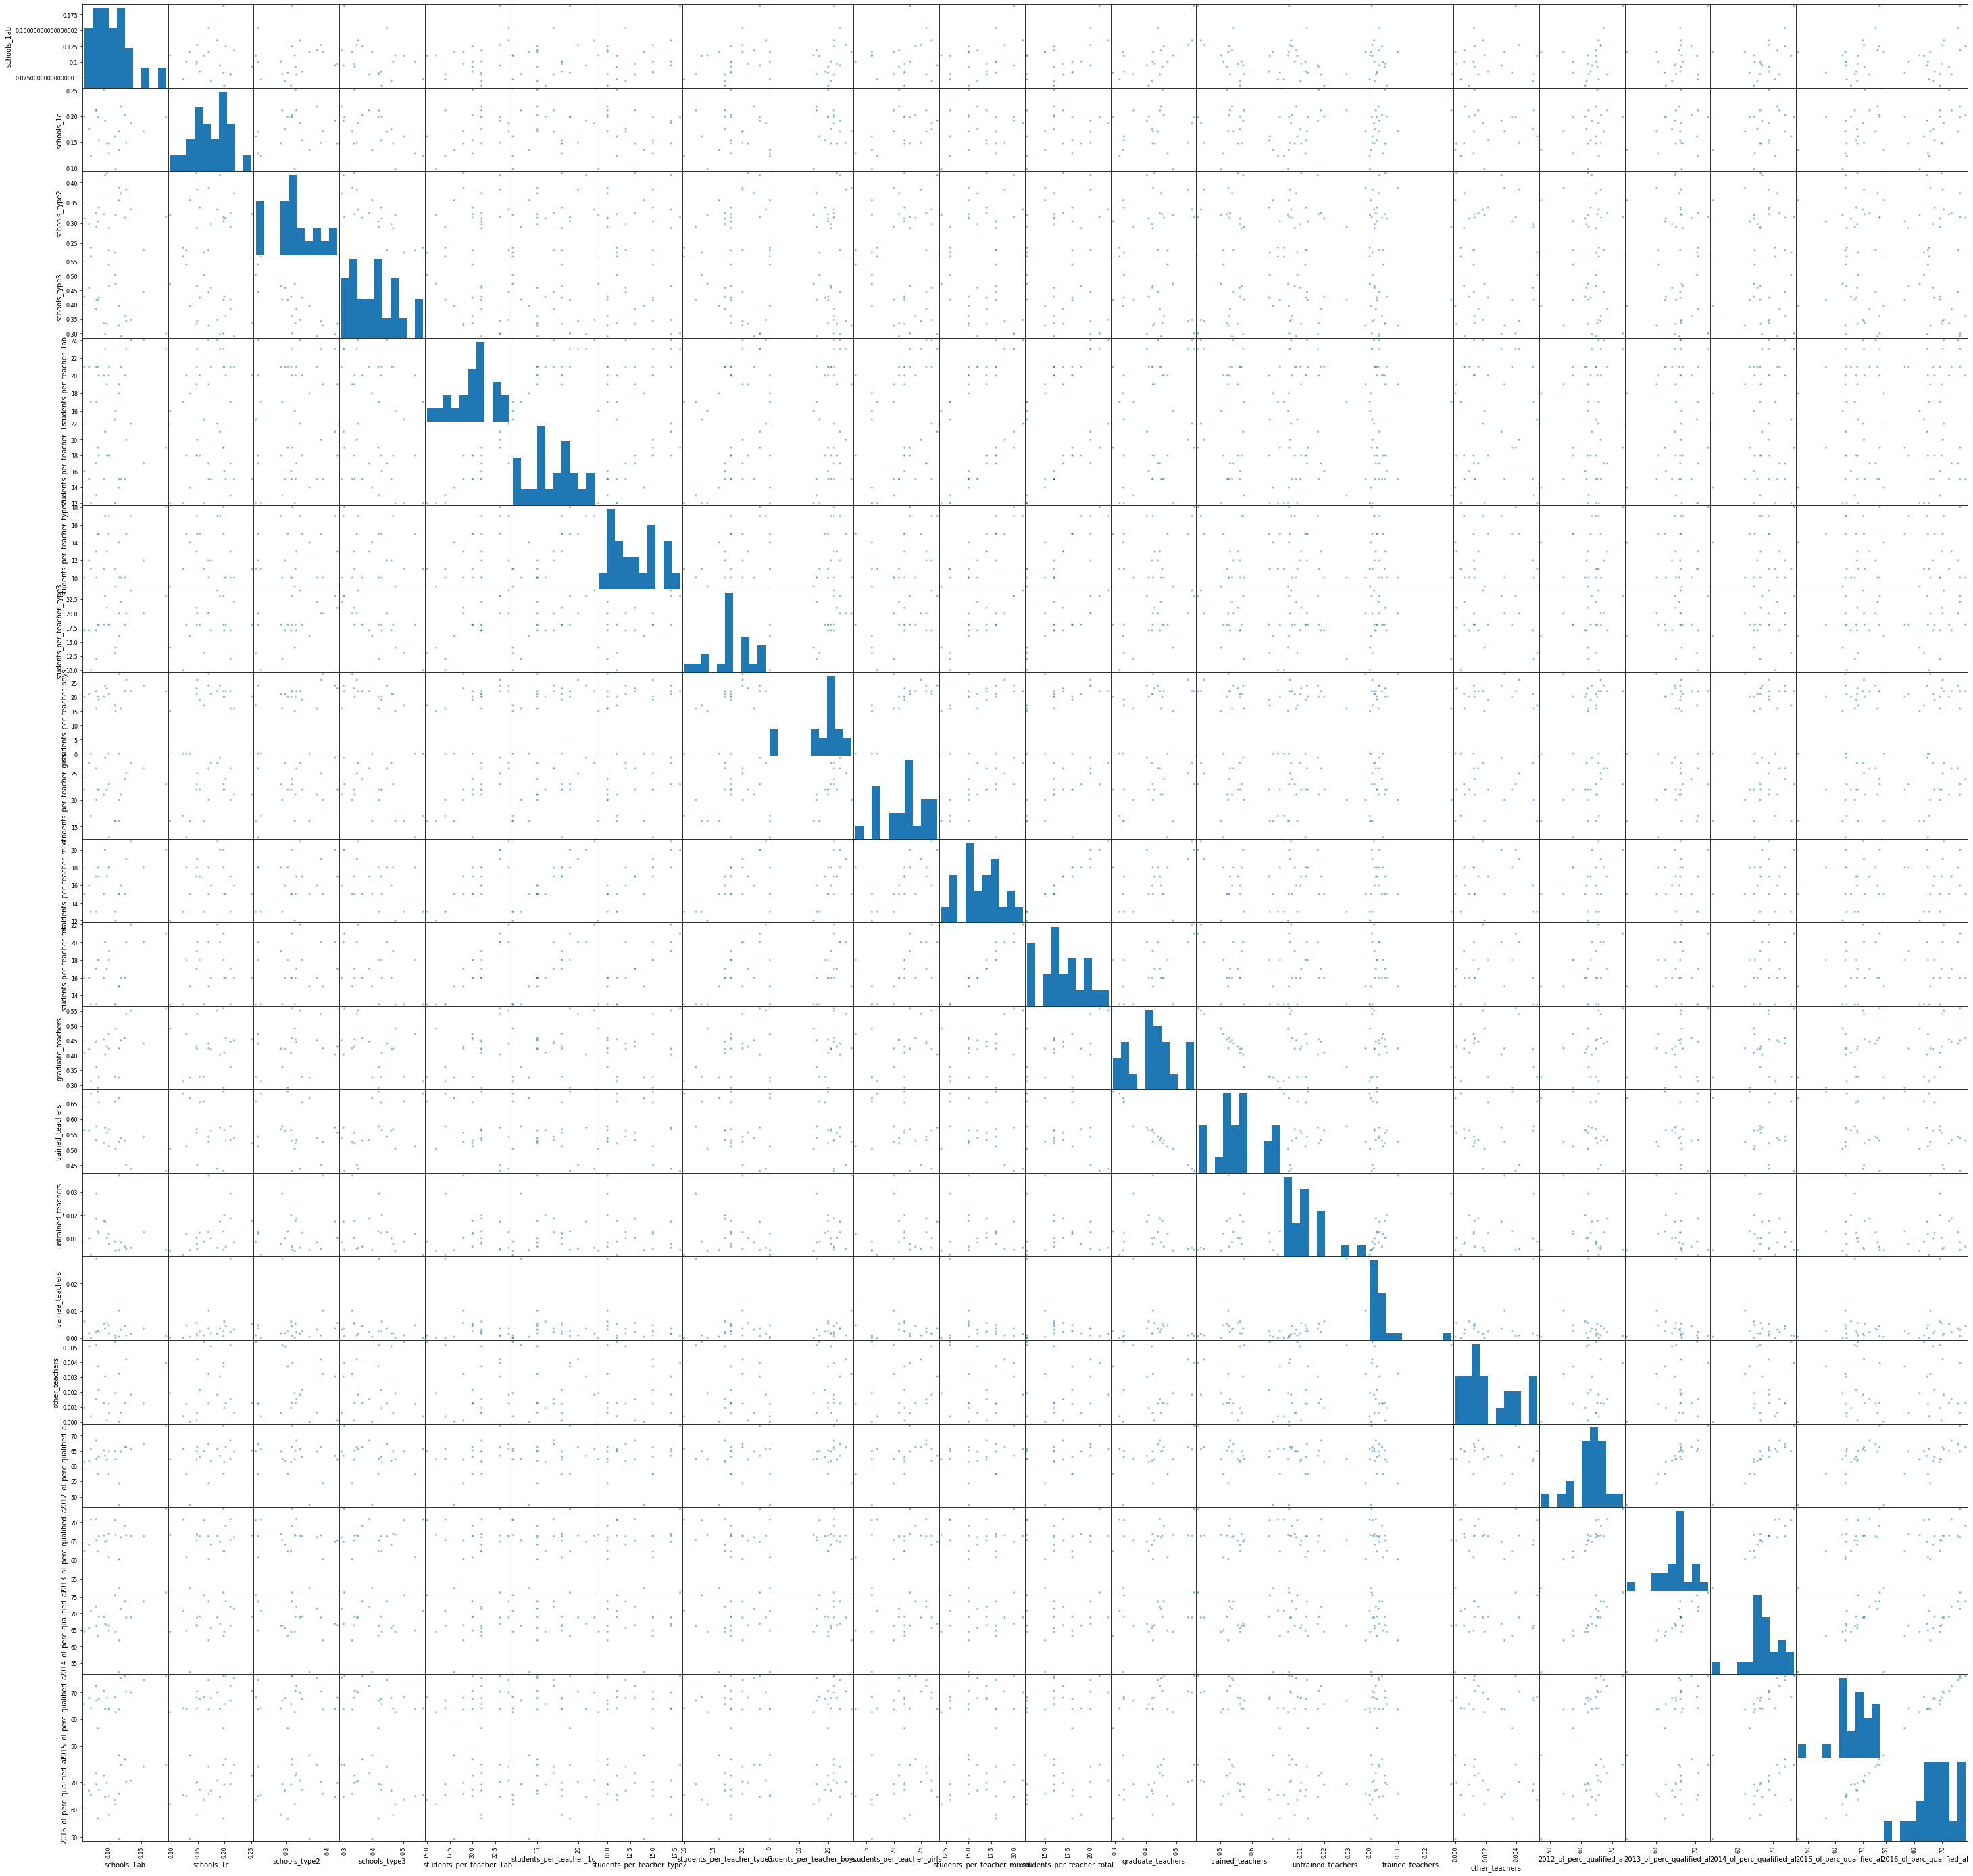

In [10]:
_ = scatter_matrix(df[cols], alpha = 0.5, figsize = (50, 50), diagonal = 'hist')

In [11]:
reg_featues = cols
X = df[reg_featues].values
Y = df['2017_ol_perc_qualified_al'].values
# X = X[np.logical_not(np.isnan(Y)), :]
# Y = Y[np.logical_not(np.isnan(Y))]
# X = preprocessing.scale(X)
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X, Y)
pred = regr.predict(X)
r_sq = regr.score(X, Y)
print(r_sq)


0.9863160905799669


In [12]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     3.540
Date:                Tue, 10 Mar 2020   Prob (F-statistic):              0.399
Time:                        10:20:33   Log-Likelihood:                -21.251
No. Observations:                  22   AIC:                             84.50
Df Residuals:                       1   BIC:                             107.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7353    115.235      0.015      0.9

In [13]:
ol_failed_2017 = pd.read_csv('ol_failed_2017.csv')
df = ol_failed_2017
df



,District,Number Sat for 5 or more subjects,Qualified for G.C.E. (A/L) No.,Qualified for G.C.E. (A/L) %,Failed in All Subjects No,Failed in All Subjects %
0,Hambantota,8913,7136,80.06,112,1.26
1,Matara,11772,9421,80.03,136,1.16
2,Galle,15540,12211,78.58,199,1.28
3,Colombo,33231,26018,78.29,693,2.09
4,Kurunegala,24146,18538,76.77,419,1.74
5,Kegalle,12083,9113,75.42,309,2.56
6,Kandy,20986,15520,73.95,500,2.38
7,Ratnapura,14862,10915,73.44,418,2.81
8,Kalutara,16946,12264,72.37,494,2.92
9,Ampara,10160,7318,72.03,228,2.24


In [14]:
ol_failed_2017 = pd.read_csv('ol_failed_2017.csv')
df = ol_failed_2017
df.columns

Index(['District', 'Number Sat for 5 or more subjects ',
       'Qualified for G.C.E. (A/L) No. ', 'Qualified for G.C.E. (A/L) %',
       'Failed in All Subjects No', 'Failed in All Subjects %'],
      dtype='object')

In [15]:
ol_failed_2016 = pd.read_csv('ol_failed_2016.csv')
df = ol_failed_2016
X = df[["Failed in All Subjects %","Failed in All Subjects No",]]
Y = df["Qualified for G.C.E. (A/L) %"]
regr = linear_model.LinearRegression(normalize=True)

regr.fit(X, Y)
pred = regr.predict(X)
r_sq = regr.score(X, Y)
print(r_sq)

ol_failed_2017 = pd.read_csv('ol_failed_2017.csv')
df2 = ol_failed_2017
X2 = df2[["Failed in All Subjects %","Failed in All Subjects No"]]
Y2 = df2["Qualified for G.C.E. (A/L) %"]

print(regr.score(X2, Y2))


0.7391996937970124
0.6910470392908532


In [16]:
df = pd.read_csv("ol_qualified_al.csv")
df

,District,2012_ol_num_sat,2012_ol_num_qualified_al,2012_ol_perc_qualified_al,2013_ol_num_sat,2013_ol_num_qualified_al,2013_ol_perc_qualified_al,2014_ol_num_sat,2014_ol_num_qualified_al,2014_ol_perc_qualified_al,2015_ol_num_sat,2015_ol_num_qualified_al,2015_ol_perc_qualified_al,2016_ol_num_sat,2016_ol_num_qualified_al,2016_ol_perc_qualified_al,2017_ol_num_sat,2017_ol_num_qualified_al,2017_ol_perc_qualified_al
0,Colombo,30496,22348,73.28,30891,22668,73.38,29019,22142,76.30,31085,23649,76.08,31933,24382,76.35,33231,26018,78.29
1,Gampaha,25727,16870,65.57,25736,17065,66.31,24764,17027,68.76,26665,18679,70.05,27719,19556,70.55,28531,20422,71.58
2,Kalutara,14648,9705,66.25,14730,9788,66.45,14310,9834,68.72,15267,10734,70.31,15762,11056,70.14,16946,12264,72.37
3,Kandy,19292,12570,65.16,19021,12629,66.40,18660,12862,68.93,18813,13266,70.52,20197,14632,72.45,20986,15520,73.95
4,Matale,6426,3941,61.33,6279,3922,62.46,6332,4080,64.43,6415,4210,65.63,7109,4911,69.08,7312,5154,70.49
5,Nuwara Eliya,9150,4931,53.89,9155,5327,58.19,9093,5539,60.91,9424,5733,60.83,10359,6389,61.68,10679,7164,67.08
6,Galle,15053,10114,67.19,14962,9906,66.21,14723,10833,73.58,14935,11138,74.58,14777,11177,75.64,15540,12211,78.58
7,Matara,11346,7524,66.31,10740,7414,69.03,10582,7792,73.63,11358,8629,75.97,11438,8950,78.25,11772,9421,80.03
8,Hambantota,8740,5659,64.75,7990,5271,65.97,7840,5598,71.40,8508,6406,75.29,8779,6701,76.33,8913,7136,80.06
9,Jaffna,8474,5268,62.17,8396,5589,66.57,8657,5578,64.43,9776,6119,62.59,9433,5847,61.98,9176,6219,67.77
